In [15]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [16]:
# Load Dataset

df = pd.read_csv("SMSSpamCollection", sep='\t', header=None,
                 names=["label","message"])

# Display first 5 rows
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# Check all values
print(df.isna())

      label  message
0     False    False
1     False    False
2     False    False
3     False    False
4     False    False
...     ...      ...
5567  False    False
5568  False    False
5569  False    False
5570  False    False
5571  False    False

[5572 rows x 2 columns]


In [18]:
print(df.isna().sum())

label      0
message    0
dtype: int64


In [19]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

103     True
154     True
207     True
223     True
326     True
        ... 
5524    True
5535    True
5539    True
5553    True
5558    True
Length: 403, dtype: bool

In [20]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (5572, 2) 

number of rows:  5572
number of columns:  2


In [21]:
# viewing the data types of columns
df.dtypes

label      str
message    str
dtype: object

In [22]:
# Statistical summary
df.describe(include='all')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


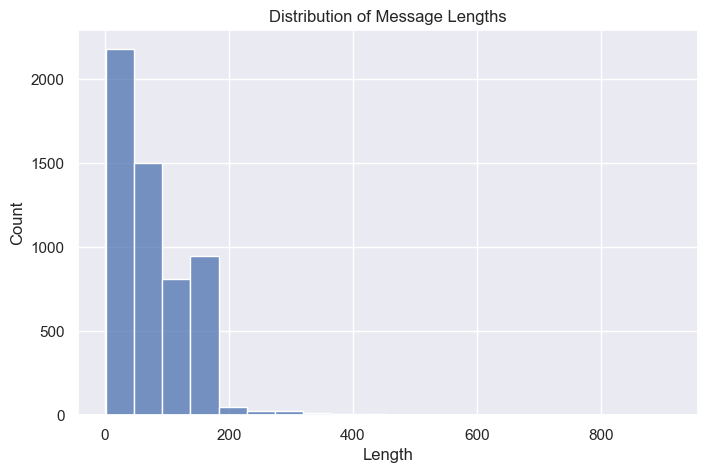

In [23]:
plt.figure(figsize=(8,5))
df['msg_len'] = df['message'].str.len()
sns.histplot(df['msg_len'], bins=20)
plt.title("Distribution of Message Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

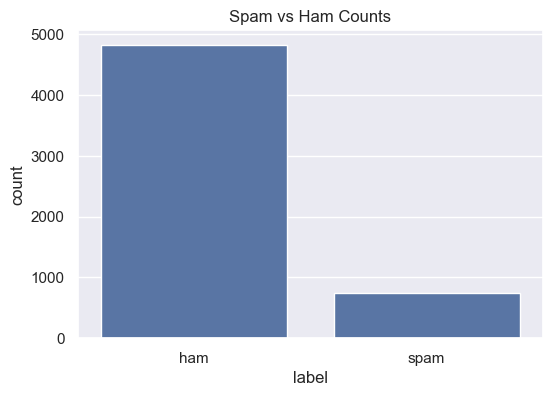

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Counts')
plt.show()

In [25]:
from collections import Counter
import re

def tokenize(text):
    return re.findall(r"\b\w+\b", text.lower())

spam_words = Counter()
ham_words = Counter()

for label, message in zip(df['label'], df['message']):
    if label == 'spam':
        spam_words.update(tokenize(message))
    else:
        ham_words.update(tokenize(message))

print("Top 10 spam words:", spam_words.most_common(10))
print("Top 10 ham words:", ham_words.most_common(10))

Top 10 spam words: [('to', 691), ('a', 380), ('call', 355), ('you', 297), ('your', 264), ('free', 224), ('2', 207), ('the', 206), ('for', 204), ('now', 199)]
Top 10 ham words: [('i', 2960), ('you', 1948), ('to', 1562), ('the', 1133), ('a', 1070), ('u', 1033), ('and', 858), ('in', 823), ('me', 777), ('my', 754)]


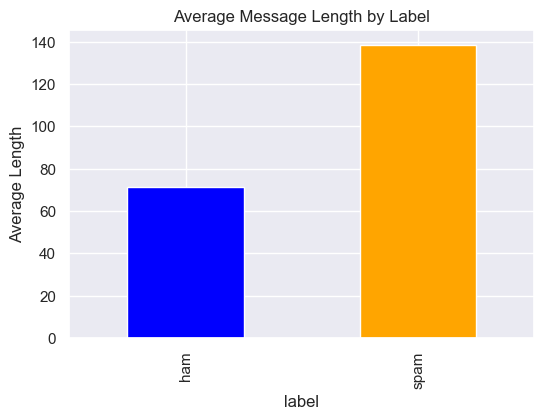

label
ham      71.482487
spam    138.670683
Name: msg_len, dtype: float64

In [26]:
avg_len = df.groupby('label')['msg_len'].mean()

plt.figure(figsize=(6,4))
avg_len.plot(kind='bar', color=['blue','orange'])
plt.title('Average Message Length by Label')
plt.ylabel('Average Length')
plt.show()

avg_len

In [27]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))

Training samples: 4457
Test samples: 1115


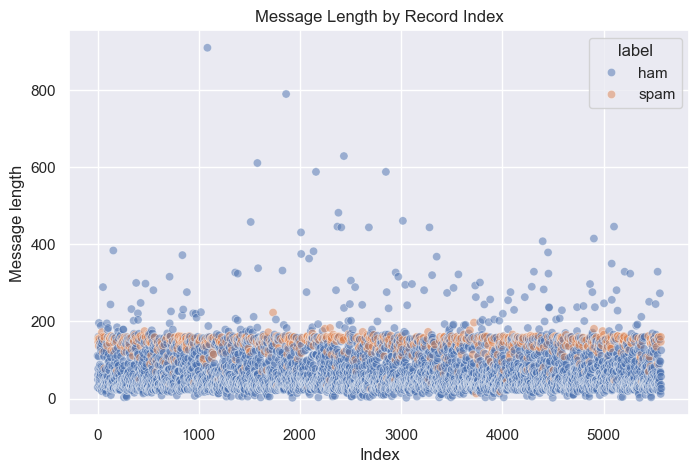

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.index, y='msg_len', hue='label', data=df, alpha=0.5)
plt.title("Message Length by Record Index")
plt.xlabel("Index")
plt.ylabel("Message length")
plt.show()